# Create Simple, Linear Data

$y = 4 + 3x + \text{random noise}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1) # pass in desired shape. In this case, (100,1)
y = 4 + 3 * X + np.random.randn(100, 1) 
# NOTE: I'm using two different random functions. rand() gives a uniform distribution, randn() gives a Gaussian distribution

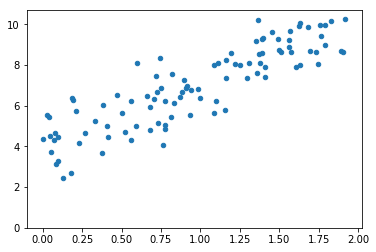

In [2]:
plt.scatter(X, y, s=20)
plt.axis(ymin=0.0)
plt.show()

# Linear Regression

simple equation for a line:  $\large {y = mx + b} $

$y$ is a linear function of the input, $x$. Our model has one input and two parameters ($m$ and $b$). $m$ is used to scale our input, and $b$ is added to that. We call $b$ the *bias term* (also called the y-intercept)

More generally, the linear regression model simply computes a weighted sum of our input features ($x_1, x_2, \ldots , x_n $) plus a constant bias term. Our parameters, including the bias term, are stored in a *parameter vector*, $\large \mathbf{\theta}$ (theta)

This is the equation of our model using just one input feature, $x_1$. We're just rewriting the above equation of a line:

$$\large{\hat{y} = \theta_0 + \theta_1 x_1}$$

The more general equation for when we have $n$ input features:

$$\large{\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n }$$

* $\hat{y}$ is the predicted target value
* $n$ is the number of features
* $x_i$ is the i-th feature value
* $\theta_j$ is the j-th paramter value ($\theta_0$ is the bias term)

We can write this equation in a *vectorized form*

$$\large{\hat{y} = h_{\theta}(\mathbf{x}) = \mathbf{\theta}^T \cdot \mathbf{x}}$$

* $\theta^T$ is the *transpose* of $\theta$
    * the transpose of a matrix, is that same matrix with the rows and columns swapped. In this case, we're taking a column vector (shape = (n,1)) and turning it into a row vector (shape = (1,n)). This allows us to multiply our two vectors as if they are matrices (dot product).
    
* $\mathbf{x}$ is the *feature vector* for one instance in our dataset, $\mathbf{X}$, where $x_0$ is always 1, and $x_i$ is the i-th feature value for i > 0
    * we add the $x_0$ term for our bias parameter

* $\mathbf{\theta}^T \cdot \mathbf{x}$ is the dot product of $\theta^T$ and $\mathbf x$

* $h_{\theta}$ is our model (or 'hypothesis function'), using model parameters $\theta$

In [3]:
X_b = np.c_[np.ones((100,1)), X] # add the bias term to every instance
print(X.shape)
print(X_b.shape)

(100, 1)
(100, 2)


# Selecting a Cost Function

Before we start training our model, we need to define an error function to minimize. One of the most common cost functions used in regression is the Mean Squared Error, or MSE. It is defined:

$$\large{MSE(\mathbf X,h_\theta) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2 }$$

Since our i-th prediction, $\hat{y}^{(i)} = \mathbf{\theta}^T \cdot \mathbf{x}^{(i)}$, we can rewrite this as

$$\large{MSE(\mathbf X,h_\theta) = \frac{1}{m} \sum_{i=1}^{m} (\mathbf{\theta}^T \cdot \mathbf{x}^{(i)} - y^{(i)})^2 }$$

When we train our model, we are concerned with the error only in terms of the model parameters, so we write $MSE(\theta) = \ldots$

In [4]:
def MSE_error(theta):
    err = 0
    m = X.shape[0]
    for i in range(m):
        y_pred = theta.T.dot(X_b[i])[0]
        err += (y_pred - y[i])**2
    return err/m

# Training Algorithm: Gradient Descent

* https://en.wikipedia.org/wiki/Gradient_descent
* Generic Optimization Algorithm - used in many domains outside of ML

A common analogy to explain Gradient Descent is to image that you are standing on hilly terrain covered in fog. You want to find the deepest valley (minimum), but can only see your immediate surroundings. Your best strategy is to look at the steepness of the terrain at your feet. Find the direction of steepest descent, walk some distance in that direction, and repeat. Eventually you will find yourself in a valley.

We are trying to find the parameter values that minimize our cost function (MSE). To do this, we approximate the *derivative* of the cost function with respect to our model parameters. When we have a multivariate (more than one input variable) function, we need to compute the *Gradient* of the function. The Gradient is the multivariable generalization of the derivative. It is a vector containing *partial derivatives.* A partial derivative is obtained by holding all other input variables constant, and differentiating our function with respect to just one variable. The Gradient, then, is a vector containing all the partial derivatives. In this case, our gradient vector will have two components.

The partial derivative of $MSE(\theta)$ with respect to one parameter, $\theta_j$ is denoted

$$\large{\frac{\partial}{\partial \theta_j} MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m} (\mathbf{\theta}^T \cdot \mathbf{x}^{(i)} - y^{(i)}) x^{(i)}_j }$$

The entire Gradient Vector can be written:

$$\large{\nabla_\theta MSE(\theta) = \begin{pmatrix} 
    \frac{\partial}{\partial \theta_0} MSE(\theta) \\
    \frac{\partial}{\partial \theta_1} MSE(\theta) \\
    \vdots \\
    \frac{\partial}{\partial \theta_n} MSE(\theta) 
    \end{pmatrix}}
        = \frac{2}{m}\mathbf{X}^T \cdot (\mathbf{X} \cdot \theta - \mathbf{y})
$$

* The vectorized form on the right lets us compute the entire gradient vector all at once.

* Also, notice that in the vectorized form, we are using the entire dataset, $\mathbf X$, at every step. This is called *Batch Gradient Descent.* 

Now that we have our gradient vector, we need to use it to update theta. In the 'walking down a hill' analogy of gradient descent, we go *some distance* in the direction of our downward gradient. This means that we take our gradient vector and scale it by some value. This value determines how big our steps are, so we call it the *learning rate.* It is denoted by the Greek letter eta, $\eta$

Here is the equation for the Gradient Descent step to compute the next value of theta:

$$\large{\theta^{(next)} = \theta - \eta \nabla_\theta MSE(\theta) }$$

starting value of theta:
 [[-0.07333716]
 [-0.33698018]]


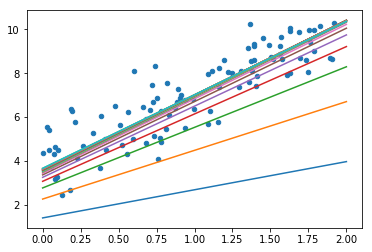

optimized value of theta:
 [[3.65900794]
 [3.35519209]]
MSE error at each iteration:


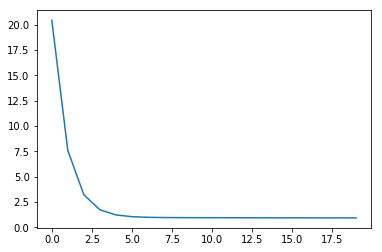

In [5]:
learn_rate = 0.1
n_iter = 20
m = X.shape[0]

MSE_list = np.zeros(shape=(n_iter,))

theta = np.random.randn(2,1) # random initialization of theta
print('starting value of theta:\n', theta)

plt.scatter(X, y, s=20)
for iter in range(n_iter):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # compute the gradient
    theta = theta - learn_rate * gradients # update theta
    
    y_0 = theta.T.dot((1,0)) # should be roughly 4
    y_2 = theta.T.dot((1,2)) # should be roughly 10
    plt.plot([0,2], [y_0,y_2])
    MSE_list[iter] = MSE_error(theta)
    
plt.show()
    
print('optimized value of theta:\n', theta)

print('MSE error at each iteration:')
plt.plot(np.arange(n_iter), MSE_list)
plt.show()

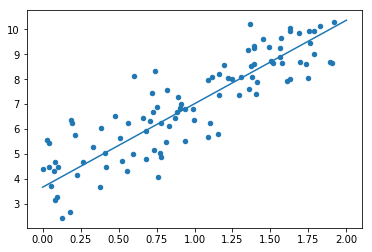

In [6]:
y_0 = theta.T.dot((1,0)) # should be roughly 4
y_2 = theta.T.dot((1,2)) # should be roughly 10

plt.scatter(X, y, s=20)
plt.plot([0,2], [y_0,y_2])
plt.show()